In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import datetime

In [ ]:
# import merged data
full_df = pd.read_csv('/content/drive/crunchv3.csv')
full_df.head()

In [ ]:
# list columns
full_df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value',
       'product_id', 'price', 'customer_city', 'customer_state',
       'product_category_name', 'Margin', 'Profit'],
      dtype='object')

In [ ]:
# Percentile summary  for 'payment_value', 'price', 'profit'

percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
percentile_summary = full_df[['payment_value', 'price', 'Profit','Margin']]

percentile_summary = percentile_summary.describe(percentiles=percentiles)

percentile_summary

In [ ]:
# Data summary
def df_summary(df):
  summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
  summary = summary.reset_index()
  summary['Column'] = summary['index']
  summary = summary[['Column','dtypes']]
  summary['Total']= df.count().values
  summary['# unique'] = df.nunique().values
  summary['# duplicates'] = df.duplicated().sum()
  summary['# missing'] = df.isnull().sum().values
  summary['Example'] = df.loc[0].values

  return summary

df_summary(full_df)

,Column,dtypes,Total,# unique,# duplicates,# missing,Example
0,order_id,object,117601,98665,11215,0,e481f51cbdc54678b7cc49136f2d6af7
1,customer_id,object,117601,98665,11215,0,9ef432eb6251297304e76186b10a928d
2,order_purchase_timestamp,datetime64[ns],117601,98111,11215,0,2017-10-02 10:56:33
3,payment_value,float64,117601,28938,11215,0,18.12
4,product_id,object,117601,32951,11215,0,87285b34884572647811a353c7ac498a
5,price,float64,117601,5968,11215,0,29.99
6,customer_city,object,117601,4110,11215,0,sao paulo
7,customer_state,object,117601,27,11215,0,SP
8,product_category_name,object,115903,73,11215,1698,utilidades_domesticas
9,Margin,float64,117601,56044,11215,0,-65.507726


<ipython-input-34-09324f92d6c6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(monthly_aov.index.astype(str), rotation=45, fontsize='8')
<ipython-input-34-09324f92d6c6>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(monthly_aov.values.astype(int), rotation=45, fontsize='8')
<ipython-input-34-09324f92d6c6>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(monthly_sales.index.astype(str), rotation=45, fontsize='8')
<ipython-input-34-09324f92d6c6>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(monthly_sales.values.astype(int), rotation=45, fontsize='8')
<i

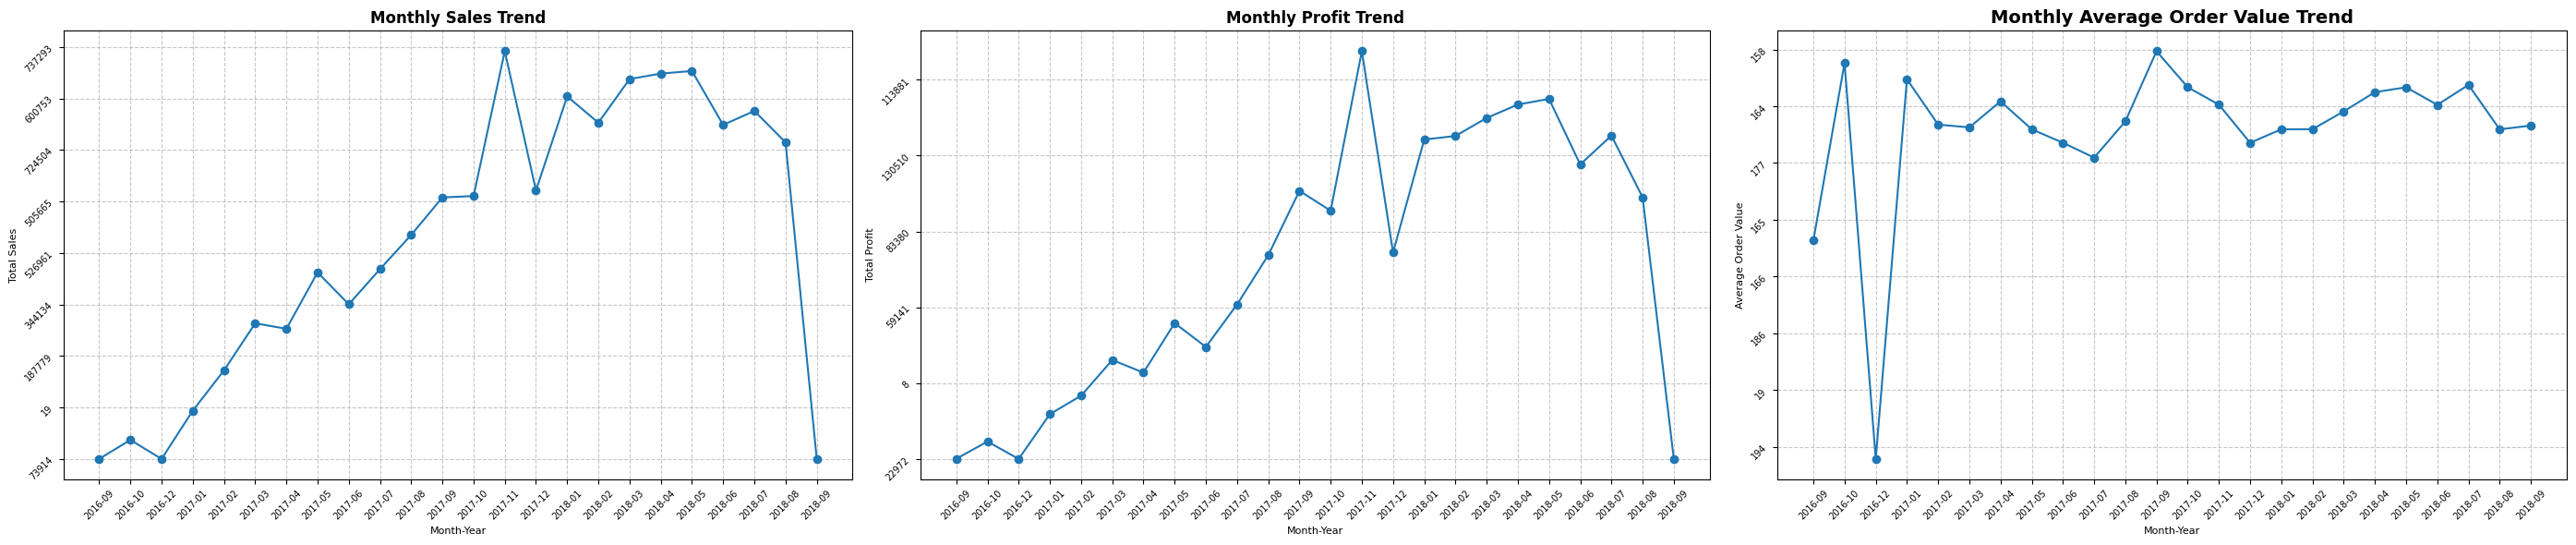

In [ ]:
# Visualize Monthly Sales & profit trends in separate plot

# Create 'month_year' column from existing date/time column

full_df['month_year'] = full_df['order_purchase_timestamp'].dt.to_period('M')

# Group data by 'Month-Year' and metrics
monthly_sales = full_df.groupby('month_year')['payment_value'].sum()
monthly_profit = full_df.groupby('month_year')['Profit'].sum()
monthly_aov = full_df.groupby('month_year')['payment_value'].mean()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(28, 6))

# Plot Monthly AOV Trend
axes[2].plot(monthly_aov.index.astype(str), monthly_aov.values, marker='o')
axes[2].set_title('Monthly Average Order Value Trend', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month-Year', fontsize=8)
axes[2].set_ylabel('Average Order Value', fontsize=8)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].grid(visible=True, linestyle='--', alpha=0.7)
axes[2].set_xticklabels(monthly_aov.index.astype(str), rotation=45, fontsize='8')
axes[2].set_yticklabels(monthly_aov.values.astype(int), rotation=45, fontsize='8')
axes[2].tick_params(axis='both', labelsize=7)

# Plot Monthly Sales Trend
axes[0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
axes[0].set_title('Monthly Sales Trend', fontsize='12',fontweight='bold')
axes[0].set_xlabel('Month-Year',  fontsize='8')
axes[0].set_ylabel('Total Sales', fontsize='8')
axes[0].grid(visible=True, linestyle='--', alpha=0.7)
axes[0].set_xticklabels(monthly_sales.index.astype(str), rotation=45, fontsize='8')
axes[0].set_yticklabels(monthly_sales.values.astype(int), rotation=45, fontsize='8')
axes[0].tick_params(axis='both', labelsize=7)

# Plot Monthly Profit Trend
axes[1].plot(monthly_profit.index.astype(str), monthly_profit.values, marker='o')
axes[1].set_title('Monthly Profit Trend', fontsize='12',fontweight='bold')
axes[1].set_xlabel('Month-Year', fontsize='8')
axes[1].set_ylabel('Total Profit', fontsize='8')
axes[1].grid(visible=True, linestyle='--', alpha=0.7)
axes[1].set_xticklabels(monthly_profit.index.astype(str), rotation=45, fontsize='8')
axes[1].set_yticklabels(monthly_profit.values.astype(int), rotation=45, fontsize='8')
axes[1].tick_params(axis='both', labelsize=7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


<ipython-input-39-234a6856c4df>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-234a6856c4df>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


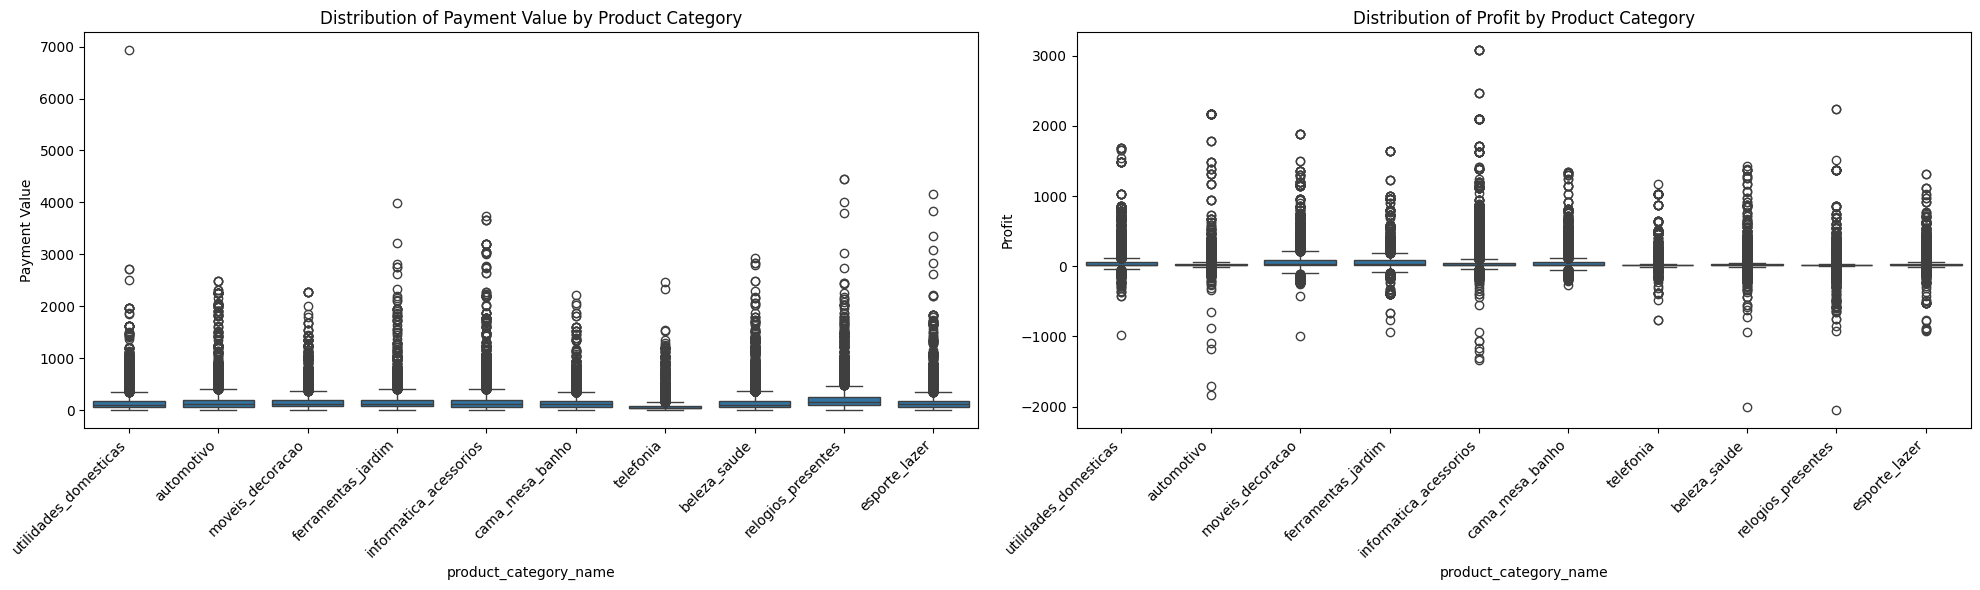

In [ ]:
# Groupby product category and calculate the mean payment value and margin
top_10_product_categories = full_df.groupby('product_category_name')['payment_value'].count().nlargest(10).index
category_stats = full_df[full_df['product_category_name'].isin(top_10_product_categories)].groupby('product_category_name').agg({'payment_value': 'mean', 'Profit': 'mean','Margin':'mean'})

#Side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Distribution of payment value for each category
sns.boxplot(x='product_category_name', y='payment_value', data=full_df[full_df['product_category_name'].isin(top_10_product_categories)], ax=axes[0])
axes[0].set_title('Distribution of Payment Value by Product Category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Payment Value')

# Profit for each category
sns.boxplot(x='product_category_name', y='Profit', data=full_df[full_df['product_category_name'].isin(top_10_product_categories)], ax=axes[1])
axes[1].set_title('Distribution of Profit by Product Category')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Profit')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()